# TEST 1

Car Pricing Predictions

Importing the Libraries

For this project we need libraries for importing the data, data descriptive statistics(first view),
data cleaning(manipulation), data modeling and evaluation.

In [1]:
#for some reason the jupyter dont recognize the xgboost method so, i can not use it
#i try to install in my machine from terminal but nothing here in jypyter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
#from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

Importing the dataset

In [2]:
dataset = pd.read_csv("cars_data.csv")

Read Dataset
Check for the first time the dataset

In [3]:
#checking the stracture of data
dataset.head(10)

,Unnamed: 0,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1221,Ambassador Classic Nova Diesel,2003,80000,Diesel,Manual,Third,12.8 kmpl,1489 CC,35.5 bhp,5.0,1350
1,398,Audi A3 35 TDI Attraction,2014,79271,Diesel,Automatic,First,20.38 kmpl,1968 CC,143 bhp,5.0,16500
2,4782,Audi A3 35 TDI Premium,2016,20003,Diesel,Automatic,First,20.38 kmpl,1968 CC,143 bhp,5.0,19250
3,4989,Audi A3 35 TDI Premium Plus,2016,39000,Diesel,Automatic,First,20.38 kmpl,1968 CC,143 bhp,5.0,18900
4,1954,Audi A3 35 TDI Technology,2017,22000,Diesel,Automatic,Second,20.38 kmpl,1968 CC,143 bhp,5.0,22500
5,2626,Audi A4 1.8 TFSI,2010,38001,Petrol,Automatic,First,12.3 kmpl,1781 CC,163.2 bhp,5.0,8500
6,3361,Audi A4 1.8 TFSI,2011,53000,Petrol,Automatic,First,12.3 kmpl,1781 CC,163.2 bhp,5.0,9500
7,5100,Audi A4 1.8 TFSI Technology Edition,2012,80000,Petrol,Automatic,First,15.64 kmpl,1798 CC,167.62 bhp,5.0,17500
8,1918,Audi A4 2.0 TDI,2013,45330,Diesel,Automatic,First,16.55 kmpl,1968 CC,147.51 bhp,5.0,13190
9,5264,Audi A4 2.0 TDI,2014,55730,Diesel,Automatic,First,16.55 kmpl,1968 CC,147.51 bhp,5.0,15210


# Data Exploration and Understanding

Check the data for outliers, the data distribution. 
Also prepare the data for data cleaning

In [4]:
#checking the no. of rows and column of our dataset
dataset.shape

(5000, 12)

In [5]:
#checking better the structure of our data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         5000 non-null   int64  
 1   Name               5000 non-null   object 
 2   Year               5000 non-null   int64  
 3   Kilometers_Driven  5000 non-null   int64  
 4   Fuel_Type          5000 non-null   object 
 5   Transmission       5000 non-null   object 
 6   Owner_Type         5000 non-null   object 
 7   Mileage            4908 non-null   object 
 8   Engine             4829 non-null   object 
 9   Power              4880 non-null   object 
 10  Seats              4963 non-null   float64
 11  Price              5000 non-null   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 468.9+ KB


In [6]:
#checking the no. of missing values
#and think a way to haddle it
#there are missing values in 4 variables
dataset.isnull().sum()

Unnamed: 0             0
Name                   0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage               92
Engine               171
Power                120
Seats                 37
Price                  0
dtype: int64

In [7]:
#checking the distribution of categorical variables
#create a strategy for future engineering in the data
#to help the data modeling for more accurate predictions
dataset["Name"].value_counts()

Mahindra XUV500 W8 2WD           38
Maruti Swift VDI                 38
Honda City 1.5 S MT              30
Maruti Swift VDI BSIV            30
Maruti Swift Dzire VDI           29
                                 ..
Mahindra Scorpio 1.99 S10 4WD     1
Mahindra Scorpio 1.99 S4 Plus     1
Mahindra Scorpio 1.99 S8          1
Mahindra Scorpio 2.6 LX           1
Volvo XC90 2007-2015 D5 AWD       1
Name: Name, Length: 1719, dtype: int64

In [8]:
#checking the distribution of categorical variables
#create the strategy for future engineering in data cleaning section
#there are:
#4 types in fuel type
#2 types in transmission
#6 types in owner but there is a problem(Snd=Second & Fst=First)
print(dataset["Fuel_Type"].value_counts())
print(dataset["Transmission"].value_counts())
print(dataset["Owner_Type"].value_counts())

Diesel      2651
Petrol      2292
CNG           48
LPG            8
Electric       1
Name: Fuel_Type, dtype: int64
Manual       3580
Automatic    1420
Name: Transmission, dtype: int64
First             4079
Second             803
Third               88
Fst                 14
Fourth & Above       8
Snd                  8
Name: Owner_Type, dtype: int64


In [9]:
#checking the descriptive statistics of numerical variables
#finding the errors and outliers
print(dataset.describe())

        Unnamed: 0          Year  Kilometers_Driven        Seats  \
count  5000.000000  5.000000e+03        5000.000000  4963.000000   
mean   3009.258000  4.628336e+04       57692.504000     5.275237   
std    1736.894449  9.428958e+05       38488.850603     0.805566   
min       0.000000  1.998000e+03         171.000000     0.000000   
25%    1509.750000  2.011000e+03       33512.750000     5.000000   
50%    3003.500000  2.014000e+03       53331.000000     5.000000   
75%    4510.250000  2.016000e+03       73000.000000     5.000000   
max    6018.000000  2.018202e+07      775000.000000    10.000000   

               Price  
count    5000.000000  
mean     9614.000000  
std     12285.358566  
min       440.000000  
25%      3500.000000  
50%      5630.000000  
75%      9927.500000  
max    220000.000000  


# Data Cleaning

in this part of code, we need to clean the data from outliers,
replace or delete missing values
prepare the data for the machine learning models

In [10]:
#remove the first column
#it is represending the car ID 
#it is not good for modeling and price prediction
dataset = dataset.iloc[:, 1:]

In [11]:
#year variable
#extract the year and compute the age of each car
#it will be more accurate and it will have more power in the models
#using as current year the 2022
curr_time = datetime.datetime.now()
dataset['Year'] = dataset['Year'].apply(lambda x : curr_time.year - x)

In [12]:
#Mileage variable has the metric value(kmpl) in the every column, same in Engine(cc),
#same in Power(bhp)
#extract this metrics and leave only the number in the columns
#this is important because the models can not been created with these values
mileage_dataset = dataset["Mileage"].str.split(" ", expand = True)
dataset["Mileage"] = pd.to_numeric(mileage_dataset[0], errors = 'coerce')

engine_dataset = dataset["Engine"].str.split(" ", expand = True)
dataset["Engine"] = pd.to_numeric(engine_dataset[0], errors = 'coerce')

power_dataset = dataset["Power"].str.split(" ", expand = True)
dataset["Power"] = pd.to_numeric(power_dataset[0], errors = 'coerce')

In [13]:
#There are missing values
#in mileage, engine, power, seats
#the strategy is to replace the missing values with the mean of each variable
#i select this form because if i delete the rows with missing values, 
#i will lose so much information from my dataset
dataset["Mileage"].fillna(dataset["Mileage"].astype("float64").mean(), inplace = True)
dataset["Engine"].fillna(dataset["Engine"].astype("float64").mean(), inplace = True)
dataset["Power"].fillna(dataset["Power"].astype("float64").mean(), inplace = True)
dataset["Seats"].fillna(dataset["Seats"].astype("float64").mean(), inplace = True)

In [14]:
#in Owner Type variable there are two wrong values
#Fst and Snd
#transform the Fst into First and Snd into Second
dataset["Owner_Type"].replace({"Fst": "First", "Snd": "Second"}, inplace=True)

visualize the numerical variables
Understand & Handling Outliers

/Users/basilisgounarismpampaletsos/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year'>

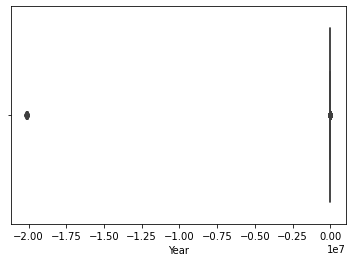

In [15]:
#Year
#we have negative year values 
#it needed fixing
sns.boxplot(dataset["Year"])

/Users/basilisgounarismpampaletsos/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Kilometers_Driven'>

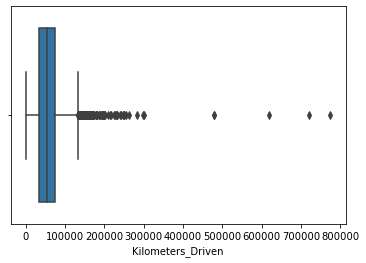

In [16]:
#Kilometers_Driven
#some outliers
#in right high values
sns.boxplot(dataset["Kilometers_Driven"])

/Users/basilisgounarismpampaletsos/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Mileage'>

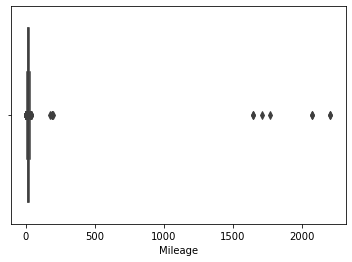

In [17]:
#Mileage
#some outliers
#right high(big) values
sns.boxplot(dataset["Mileage"])

/Users/basilisgounarismpampaletsos/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Engine'>

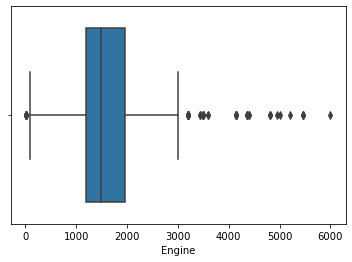

In [18]:
#Engine
#some outliers again in right(high) values
sns.boxplot(dataset["Engine"])

/Users/basilisgounarismpampaletsos/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Power'>

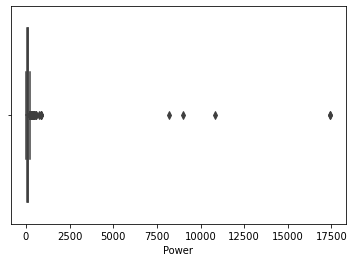

In [19]:
#Power
#some outliers again in right(high) values
sns.boxplot(dataset["Power"])

/Users/basilisgounarismpampaletsos/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Seats'>

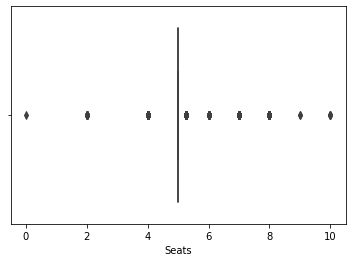

In [20]:
#Seats
#some outliers again in right(high) values
sns.boxplot(dataset["Seats"])

/Users/basilisgounarismpampaletsos/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

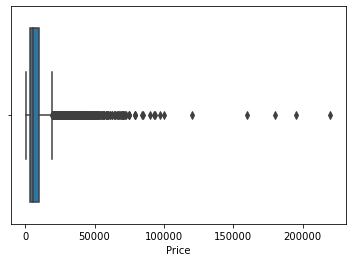

In [21]:
#Price
#Target Variable
#some outliers again in right(high) values
sns.boxplot(dataset["Price"])

My selection to remove the outliers is the Inter Quartile Range.
This method delete a lot of values from 5000 to 4071.
I loose a lot of information from my dataset but i select this way.
It is more scientific and good.
The other way is to set a range in values by hand.
The manual way is more fixable and personal but it is more sensitive in human errors.

In [22]:
cols = ['Kilometers_Driven', 'Year', 'Mileage', 'Engine', 'Power', 'Price']

Q1 = dataset[cols].quantile(0.25)
Q3 = dataset[cols].quantile(0.75)
IQR = Q3 - Q1

dataset = dataset[~((dataset[cols] < (Q1 - 1.5 * IQR)) |(dataset[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

I choose to extract the name of manufacturer from Name variable. 
With this way, we can boost the models' accuracy.
The reason behind this is that there are values in Name variable which are the same but in different edition of the same car. The value of a car depends a lot on the manufacturer name and no so much of the edition or some specific features. 

In [23]:
new_dataset = dataset["Name"].str.split(" ", expand = True)
dataset["Manufacturer"] = new_dataset[0]

#delete the Name variable
dataset.drop("Name", axis = 1, inplace = True)

 # Descriptive Statistics and Visualisations

In this section of the project there are the descriptive statistcs of the data.
Building basic Visualisations to understand the data distribution and the connection between them.
Creating correlation matrix to understand the correlation between the variables.

/Users/basilisgounarismpampaletsos/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


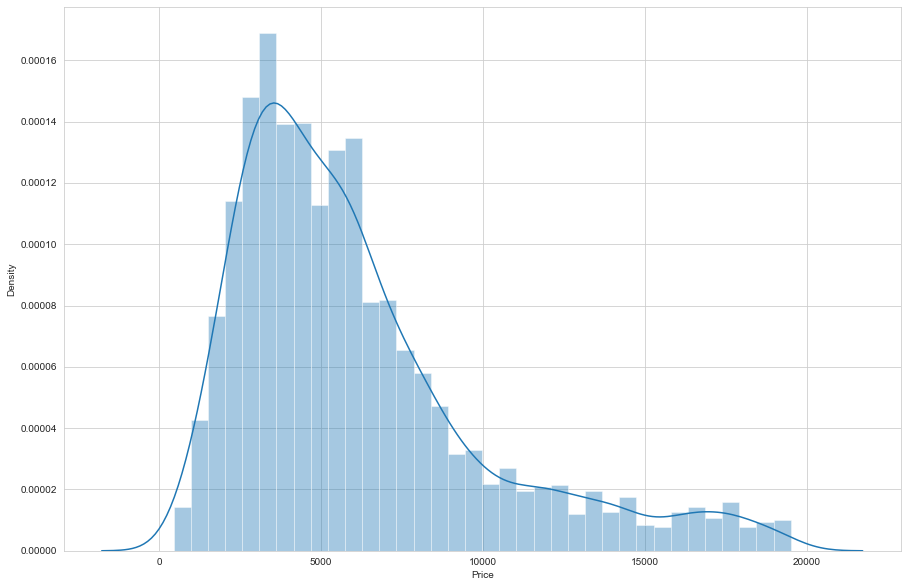

In [24]:
#Visualize the price to check the density of this variable
#after cleaning and scaling the data are smoother in this variable and also in the others
#the car's prices are between 3000 and 10000 (euros? dollar? yen?) 
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
sns.distplot(dataset.Price)
plt.show()

/Users/basilisgounarismpampaletsos/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


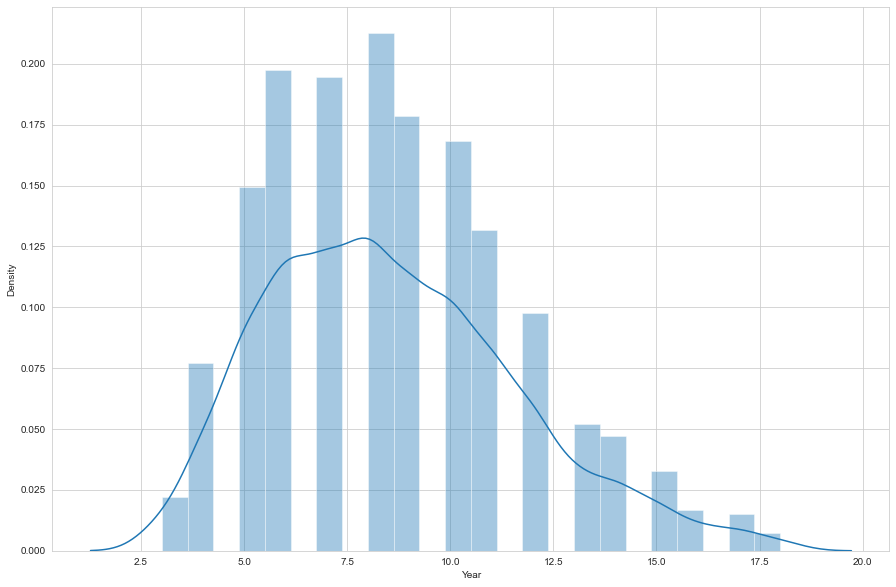

In [25]:
#Visualize the Year to check the density of this variable
#after cleaning and scaling the data are smoother in this variable and also in the others
#the distribution of cars' age is around 5-10 years old
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
sns.distplot(dataset.Year)
plt.show()

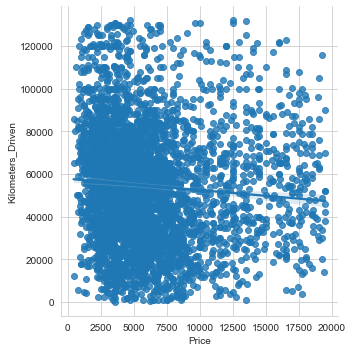

In [26]:
#visualising the kilometers of the cars by price
#understanding that as the kilometers increasing, the price decreasing
sns.lmplot(x="Price", y="Kilometers_Driven", data=dataset)

/Users/basilisgounarismpampaletsos/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


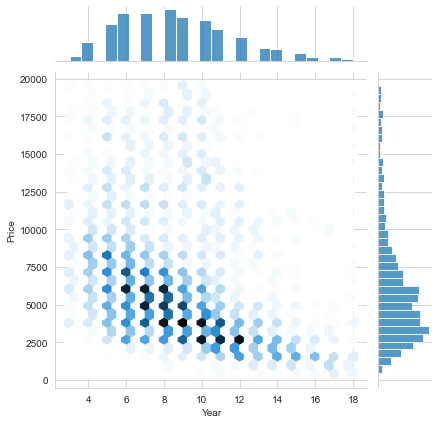

In [27]:
#visualising the year(age of a car) per price
#understanding that as newest is a car, the price is higher
#also the main distribution in this graph is between 2500 and 10000(for price) and 4-10(for year/age)
sns.jointplot(dataset["Year"], dataset["Price"], kind="hex")

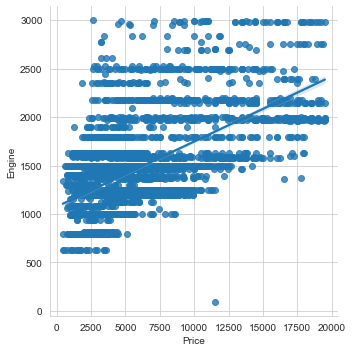

In [28]:
#visualising the engine capacity of the cars by price
#understanding that as the capasity of the engine increasing, the price increasing also
#in 2022 only the luxury cars have big engines so the graphs is probably correct
#the average cars' engine capacity is around the 1300cc
sns.lmplot(x="Price", y="Engine", data=dataset)

Text(0, 0.5, 'Count of cars')

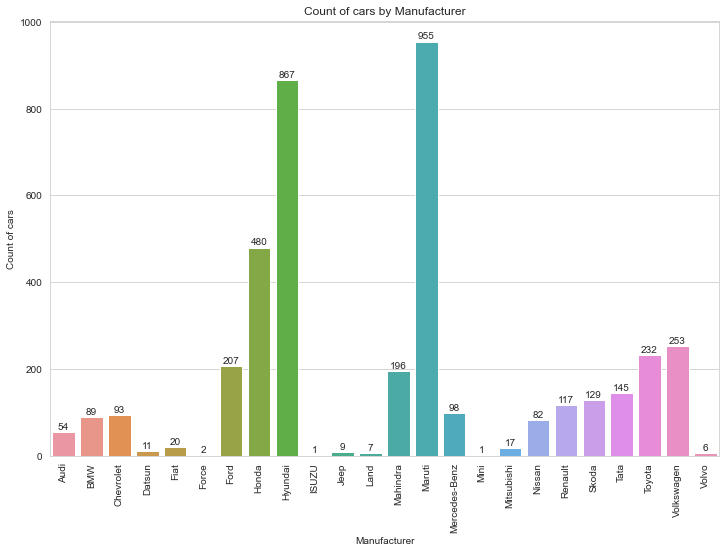

In [29]:
#barplot to check the distribution of manufacturers
#top 3 manufacturers:
#1.maruti, 2.hyundai, 3.honda
plt.figure(figsize = (12, 8))
plot = sns.countplot(x = 'Manufacturer', data = dataset)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of cars by Manufacturer")
plt.xlabel("Manufacturer")
plt.ylabel("Count of cars")

/Users/basilisgounarismpampaletsos/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fuel_Type', ylabel='Price'>

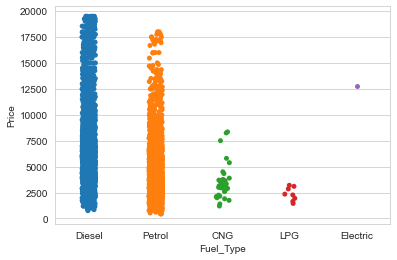

In [30]:
#visualising the fuel type per price
#checking the distribution of car's transmission by price
sns.stripplot(dataset["Fuel_Type"], dataset["Price"])

/Users/basilisgounarismpampaletsos/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Owner_Type', ylabel='Price'>

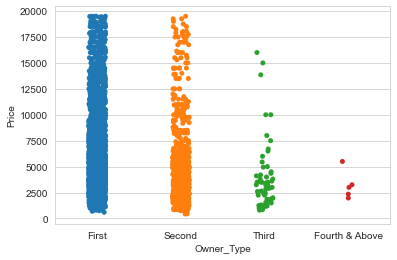

In [31]:
#visualising the fuel type per price
#checking the distribution of car's owner_type by price
sns.stripplot(dataset["Owner_Type"], dataset["Price"])

/Users/basilisgounarismpampaletsos/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Transmission', ylabel='Price'>

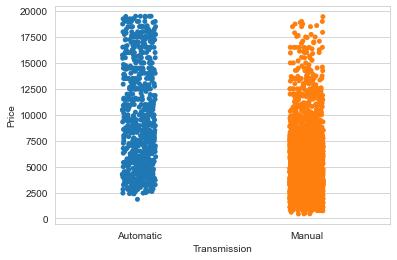

In [32]:
#visualising the fuel type per price
#checking the distribution of car's Transmission by price
sns.stripplot(dataset["Transmission"], dataset["Price"])

/Users/basilisgounarismpampaletsos/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fuel_Type', ylabel='count'>

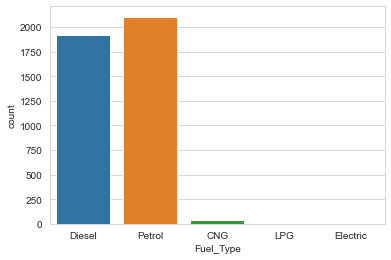

In [33]:
#visualising the distribution of Fuel_Type
#the most of our cars has petrol engine 
#the cng/lpg/electric are a very small sampling from our data
sns.countplot(dataset["Fuel_Type"])

/Users/basilisgounarismpampaletsos/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Transmission', ylabel='count'>

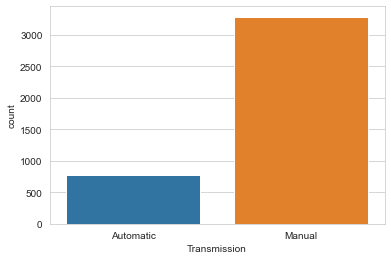

In [34]:
#visualising the distribution of transmission
#most of the cars have manual transmission
sns.countplot(dataset["Transmission"])

/Users/basilisgounarismpampaletsos/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Owner_Type', ylabel='count'>

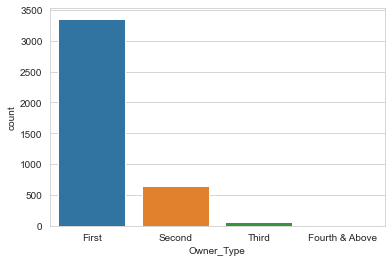

In [35]:
#visualising the distribution of owner type
#we have very large gap between first hand and second hand cars
#this is good feauture for future sales
sns.countplot(dataset["Owner_Type"])

In [36]:
#cheching the correlation values(pearson r)
print(dataset.corr())

                       Year  Kilometers_Driven   Mileage    Engine     Power  \
Year               1.000000           0.497225 -0.359203  0.162136  0.138179   
Kilometers_Driven  0.497225           1.000000 -0.165689  0.309959  0.178700   
Mileage           -0.359203          -0.165689  1.000000 -0.604643 -0.530103   
Engine             0.162136           0.309959 -0.604643  1.000000  0.751577   
Power              0.138179           0.178700 -0.530103  0.751577  1.000000   
Seats             -0.033813           0.171038 -0.345617  0.514821  0.209012   
Price             -0.371657          -0.076298 -0.246622  0.591730  0.653675   

                      Seats     Price  
Year              -0.033813 -0.371657  
Kilometers_Driven  0.171038 -0.076298  
Mileage           -0.345617 -0.246622  
Engine             0.514821  0.591730  
Power              0.209012  0.653675  
Seats              1.000000  0.269214  
Price              0.269214  1.000000  


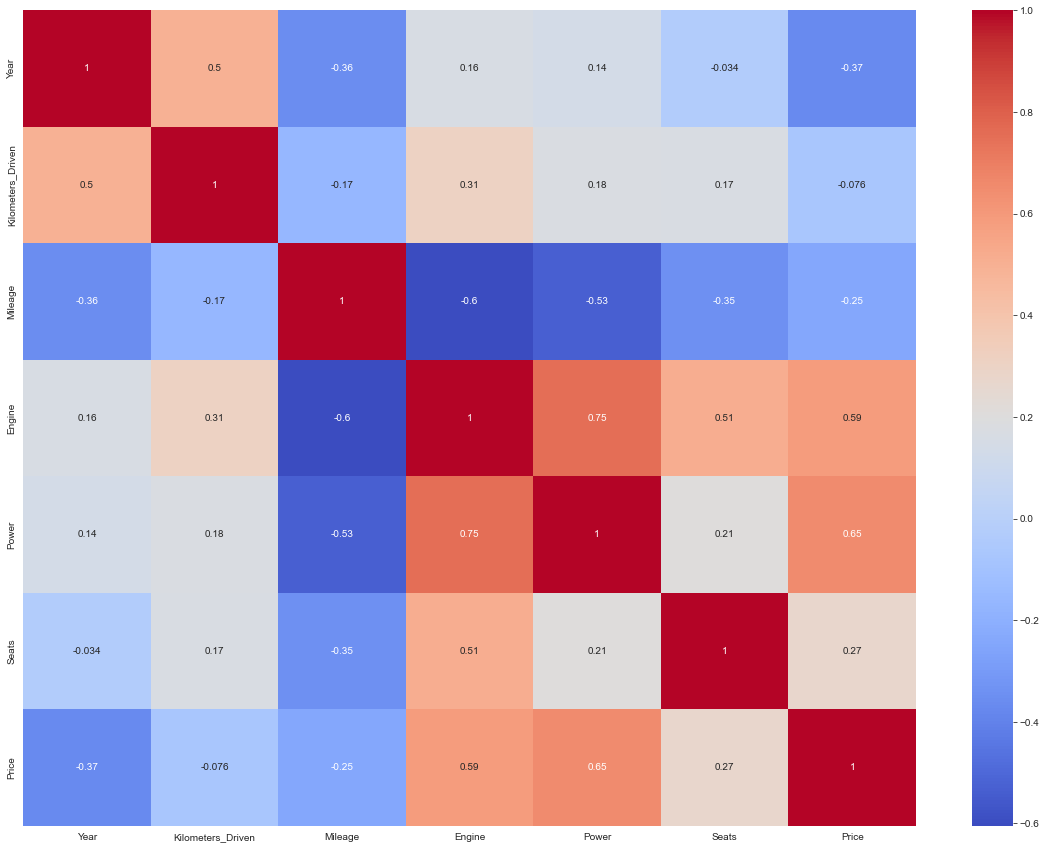

In [37]:
#creating the correlation matrix for better understanding and screening of the correlations
plt.figure(figsize=(20, 15))
correlations = dataset.corr()
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

As we can see, the highest correlation in the box is the engine with power. They are positive high correlated(0.75), and that has sense because as the engine getting bigger in cc, so the power is getting bigger in horses. Another remarkable correlation relationship is the price with engine and power. It means that one car is getting more and more expensive if the engine and the power is getting bigger and bigger. 
Also as bigger is getting the engine, the fuel consumption(mileage) is getting less and less(negative correlation. 
One last is the positive correlation between year(age) of the car and kilometers driven.

# Data Modeling

In this stage there are the split of the data, the models' building, and evalutaion of the models

In [38]:
#creating the dependent and independent dataframe for data spliting
X = dataset.drop(["Price"], axis = 1)
Y = dataset["Price"]

In [39]:
print(X)

      Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  \
1        8              79271    Diesel    Automatic      First    20.38   
2        6              20003    Diesel    Automatic      First    20.38   
3        6              39000    Diesel    Automatic      First    20.38   
5       12              38001    Petrol    Automatic      First    12.30   
6       11              53000    Petrol    Automatic      First    12.30   
...    ...                ...       ...          ...        ...      ...   
4988    14              79000    Diesel    Automatic      First    13.10   
4990     9              92000    Diesel    Automatic      First    23.30   
4993    10              86000    Diesel    Automatic     Second    14.70   
4994     8              93144    Diesel    Automatic      First    14.70   
4997    11             106976    Diesel    Automatic      First    13.50   

      Engine  Power  Seats Manufacturer  
1     1968.0  143.0    5.0         Audi  
2  

In [40]:
print(Y)

1       16500
2       19250
3       18900
5        8500
6        9500
        ...  
4988    10990
4990    16000
4993    18250
4994    17150
4997    13800
Name: Price, Length: 4071, dtype: int64


Now the data are ready to split into training set and test set
Choosing to split the data in 70-30. 
70% training set
30% test set

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)

In [42]:
#encode the categorical variablew
#create the dummy variables
#sklearn exei one hot enconding
X_train = pd.get_dummies(X_train, columns = ["Fuel_Type", "Transmission", "Owner_Type", "Manufacturer"],
                        drop_first = True)

X_test = pd.get_dummies(X_test, columns = ["Fuel_Type", "Transmission", "Owner_Type", "Manufacturer"],
                        drop_first = True)

In [43]:
#fill with zeros the missing columns --- if there are missing columns
missing = set(X_train.columns) - set(X_test.columns)
for col in missing:
    X_test[col] = 0
X_test = X_test[X_train.columns]

In [44]:
#the final step is to scale the numerical variables
#scale the values to improve the models' accuracy
#normalize the numbers as similar as possible
StandardScaler = StandardScaler()
StandardScaler.fit(X_train)
X_train = StandardScaler.transform(X_train)
X_test = StandardScaler.transform(X_test)

Begin the creation of the models

In [45]:
#MODEL 1 - LINEAR REGRESSION
#linear regression (lr)
#i use the basic regressor to see the regression between the variables and the distribution of the data
lr = LinearRegression()
lr.fit(X_train, Y_train)
lr_pred = lr.predict(X_test)
r2_score(Y_test, lr_pred)

0.7821045218045614

In [46]:
#computing the mean squared error
MSE = np.square(np.subtract(Y_test,lr_pred)).mean()
print(MSE)

3219647.977544738


In [47]:
#computing the mean absolute error
mae(Y_test,lr_pred)

1318.0771361296354

In [48]:
#MODEL 2 - LASSO Regression
lasso = Lasso()
lasso.fit(X_train, Y_train)
las_pred = lasso.predict(X_test)
r2_score(Y_test, las_pred)

0.7823818137865626

In [49]:
#computing the mean squared error
MSE = np.square(np.subtract(Y_test,las_pred)).mean()
print(MSE)

3215550.6801779787


In [50]:
#computing the mean absolute error
mae(Y_test,las_pred)

1318.0542766051178

In [51]:
#MODEL 3 - Random Forest
rf = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf.fit(X_train, Y_train)
rf_pred = rf.predict(X_test)
r2_score(Y_test, rf_pred)

0.84295199962701

In [52]:
#computing the mean squared error
MSE = np.square(np.subtract(Y_test,rf_pred)).mean()
print(MSE)

2320558.8338314034


In [53]:
#computing the mean absolute error
mae(Y_test,rf_pred)

963.4008947966926

In [54]:
#MODEL 4 - Decision Trees
dt = DecisionTreeRegressor()
dt.fit(X_train, Y_train)
dt_pred = dt.predict(X_test)
r2_score(Y_test, dt_pred)

0.7320202258750124

In [55]:
#computing the mean squared error
MSE = np.square(np.subtract(Y_test,dt_pred)).mean()
print(MSE)

3959699.140752864


In [56]:
#computing the mean absolute error
mae(Y_test,dt_pred)

1261.6284779050736

In [57]:
#MODEL 5 - Gradient Boosting Regressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train, Y_train)
gbr_pred = gbr.predict(X_test)
r2_score(Y_test, gbr_pred)

0.8475756379398273

In [58]:
#computing the mean squared error
MSE = np.square(np.subtract(Y_test,gbr_pred)).mean()
print(MSE)

2252239.436540336


In [59]:
#computing the mean absolute error
mae(Y_test,gbr_pred)

1019.3864979442321

In [60]:
#no time to visualize the variable importance in each model.
#from sklearn.inspection import permutation_importance
#
# Get Feature importance data using feature_importances_ attribute
#
#feature_importance = gbr.feature_importances_
#sorted_idx = np.argsort(feature_importance)
#pos = np.arange(sorted_idx.shape[0]) + .5
#fig = plt.figure(figsize=(8, 8))
#plt.barh(pos, feature_importance[sorted_idx], align='center')
#plt.yticks(pos, np.array(dataset.feature_names)[sorted_idx])
#plt.title('Feature Importance (MDI)')
#result = permutation_importance(gbr, X_test, Y_test, n_repeats=10,random_state=42, n_jobs=2)
#sorted_idx = result.importances_mean.argsort()
#fig.tight_layout()
#plt.show()

In [61]:
#MODEL 6 - XGBoost Regressor
xgb = XGBRegressor()
xgb.fit(X_train, Y_train)
XGB_pred = XGB.predict(X_test)
r2_score(Y_test, xgb_pred)

NameError: name 'XGBRegressor' is not defined

# RESULTS

The approach of this project follows the Crisp-DM method. First of all in the given time, i tried to understand the business problem and create a strategy. After is the data screaning and understanding(first view). The data has some problems in name giving(fst-first)(2012-20122013) etc etc, and also some outliers. All these problems were handling in data cleaning section. After that i was trying to visualise a better look of the data distribution. Found and explain some key points such as some good correlations or some measures from visualisations(example-maruti are the most of our car).
The next step was to build our models. The best model is Gradient Boosting Regressor with r2 = 0.8480439911533084 (84.8% accuracy in predictions), and with the smallest mse = 2254661.97 and mae = 1020.03. 


Feature Use and Fixes.
If i have time, the first of all is that i will make is the data preparation. Using more time, giving more accurate and better data to model creators. Next, i will try to do some very nice visualisations to create a good kpi for management or marketing team, to understand the data better. 
With feature importance, we have the opportunity to check which variables are important for each of our models. This means that, our company can check which features of the car is important and affect the selling price. For example: if in one model the seats, the year and the fuel are important, we have this knowledge and we can create a better strategy for our sales, selecting cars with x no. of seats and from this year(age) and only diesel, because are important for the selling price. 
That's my approach to these problemes. Understand the data with correlations and visualisations and predict the price and find the better variables which affect the most the target variable.

After that i will try to improve the models with cross validation or grid search and see the details in the models. 
So, there are so much improvment but i am very happy with my test in the time giving. 

Thank you. 
Vasilis